# 확률 밀도 함수와 KDE 플롯

### KDE (Kernel Density Estimation)
- **정의**: 데이터의 분포를 부드럽게 추정하는 비모수적 방법 (표본 -> 모집단 추정)
- **특징**:
  - 데이터 포인트를 기반으로 연속적인 밀도를 추정.
  - `밴드폭을 설정`해 부드러움 조정.
  - 실제 데이터(표본) 에 기반한 분포.

### PDF (Probability Density Function)
- **정의**: (모집단의) 확률 밀도를 나타내는 함수.
- **특징**:
  - 특정 분포(정규분포 등)에 대한 이론적 정의.
  - 구간 내 확률을 적분하여 구함.
  - 확률 분포의 수학적 모델.

### 주요 차이
- **비모수적 vs 모수적**: KDE는 데이터 기반의 비모수적(표본->모집단 추정) 방법, PDF는 이론적(모집단) 분포 기반.
- **밴드폭**: KDE는 `밴드폭(조정 가능)` 설정 필요, PDF는 고정된 함수.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data-2/body.csv') # 키, 몸무게 (연속형 데이터)
df

,height,weight
0,188.3,85.8
1,176.2,78.0
2,175.9,75.6
3,181.1,85.1
4,182.6,82.3
...,...,...
495,172.0,70.0
496,169.6,83.0
497,163.3,68.6
498,185.7,95.6


### bw_method (bandwidth method) : 밴드폭
- **의미**: KDE에서 커널 함수의 **밴드폭**(데이터 주변에서 커널이 `얼마나 넓게 퍼질지`를 결정)을 설정하는 방법.
  - **크면**: 곡선이 부드러워지며, 데이터의 세부 변동을 덜 반영.
  - **작으면**: 곡선이 세밀해지며, 데이터의 작은 변동까지 반영. 하지만 과적합 위험이 있음.

### 조정 방법
- **기본값**: scott 또는 silverman 방법을 통해 `자동으로 설정`됨.
- **`수동 조정`**:
  - **큰 값** (예: `bw_method=2`): 데이터의 전체적인 추세를 확인할 때.
  - **작은 값** (예: `bw_method=0.5`): 데이터의 세부 분포를 보고 싶을 때.
  
### 노하우
- **시각적 확인**: 다양한 값을 시도하며 적절한 밴드폭을 찾아 시각적으로 확인.

- **데이터 특성에 맞게**: 데이터의 크기와 분포에 따라 적절한 밴드폭 선택.

- **자동 설정 활용**: 자동 설정 후 필요시 수동 조정을 시도.

In [3]:
!pip3 install scipy

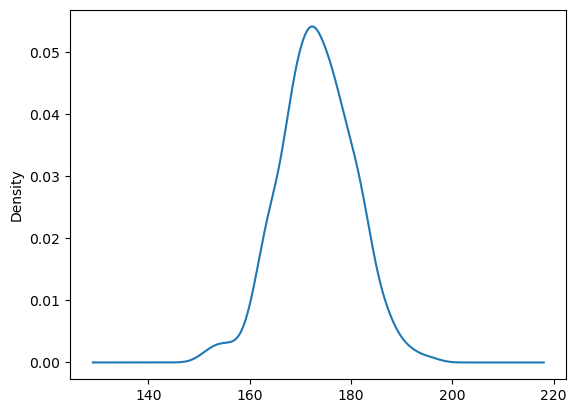

In [5]:
 #bw_method가 자동 설정
df['height'].plot(kind='kde')
plt.show()

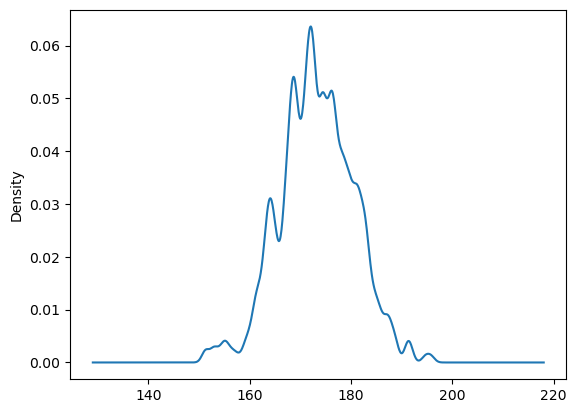

In [6]:
 #수동 설정 - 세밀하게
df['height'].plot(kind='kde', bw_method=0.1) 
plt.show()

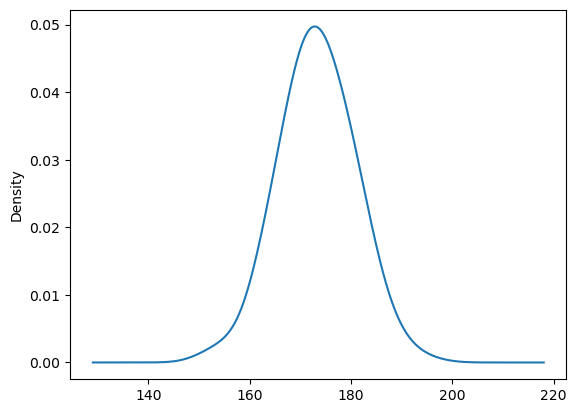

In [9]:
 # 수동 조정 - 대략적
df['height'].plot(kind='kde', bw_method=0.5) 
plt.show()